<a href="https://colab.research.google.com/github/zpsy-hub/Data-Mining-Principles/blob/main/Data_Mining_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Reading Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Show all columns
pd.set_option('display.max_columns', None)

# Load the datasets
df_customer_feedback = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/raw data/Customer_Feedback_Data.csv')
df_product_offering = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/raw data/Product_Offering_Data.csv')
df_transaction = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/raw data/Transaction_Data.csv')


# **Data Overview**

In [3]:
# Dictionary of DataFrames
dfs = {
    'Customer Feedback Data': df_customer_feedback,
    'Product Offering Data': df_product_offering,
    'Transaction Data': df_transaction
}

### Summary Statistics

In [4]:
for name, df in dfs.items():
    print(f"{name}:\n{df.describe()}\n")

Customer Feedback Data:
       Customer_ID  Satisfaction_Score  Likelihood_to_Recommend
count  5050.000000         4949.000000              5050.000000
mean    501.949703            5.684785                 5.571287
std     288.806331            3.606511                 2.872577
min       1.000000            1.000000                 1.000000
25%     253.000000            3.000000                 3.000000
50%     502.000000            6.000000                 6.000000
75%     751.750000            8.000000                 8.000000
max    1000.000000           60.000000                10.000000

Product Offering Data:
       Product_ID  Target_Age_Group
count   15.000000               0.0
mean     5.133333               NaN
std      3.159265               NaN
min      1.000000               NaN
25%      2.500000               NaN
50%      5.000000               NaN
75%      7.500000               NaN
max     10.000000               NaN

Transaction Data:
       Transaction_ID  Customer_I

### Number of rows and columns in the DataFrame


In [5]:
for name, df in dfs.items():
    print(f"{name}: {df.shape}")

Customer Feedback Data: (5050, 4)
Product Offering Data: (15, 6)
Transaction Data: (5050, 5)


###Display Index, Columns, and Data

In [6]:
for name, df in dfs.items():
    print(f"\n=== {name} ===")
    print("DataFrame Info:\n")
    df.info()




=== Customer Feedback Data ===
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB

=== Product Offering Data ===
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Ta

In [7]:
for name, df in dfs.items():
    print(f"{name}:\n{df.head()}\n")

Customer Feedback Data:
   Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
0            1                10.0     Very satisfied                        9
1            2                 3.0     Very satisfied                        3
2            3                10.0     Very satisfied                        1
3            4                 7.0  Needs improvement                        4
4            5                 8.0     Unsatisfactory                        7

Product Offering Data:
   Product_ID                   Product_Name     Product_Type Risk_Level  \
0           1           Platinum Credit Card      Credit Card     Medium   
1           2           Gold Savings Account  Savings Account        Low   
2           3  High-Yield Investment Account       Investment       High   
3           4                  Mortgage Loan             Loan     Medium   
4           5                      Auto Loan             Loan     Medium   

   Target_Age_Group T

##**Observations after Cursory look at the data**


####**Customer Feedback Data**
This dataset seems to be about collecting feedback from customers about their experiences with a product or service.

|Column Name|Description|Data Type|Sample Data|
|:---|:---|:---|:---|
|Customer_ID|A unique identifier for each customer|int|1, 2, 3|
|Satisfaction_Score|A numerical score indicating how satisfied the customer is|float|10.0, 3.0, 7.0|
|Feedback_Comments|A categorical field with short comments about the service|object|Very satisfied, Needs improvement|
|Likelihood_to_Recommend|A numerical score showing how likely the customer is to recommend the product/service|int|9, 3, 1|

Based on the df.describe():
*   `Customer_ID`: Ranges from 1-1000, but total count is 5050 so there are repeat customers that gave multiple feedback.
*   `Satisfaction_Score`: Max is 60, but mean is 5.68 and 75th prinicple is 8.00, 60 seems like an outlier.
*   `Likelihood_to_Recommend`: Range is 1 to 10, seems to be a scale.

Recommendations:


*   Change `Satisfaction_Score` to int.
*   `Feedback_Comments`, check if it can be categorical, seems like the same comments repeat. There are only 5 comments throughout the column,Very satisfied, Good service, Needs improvement, Unsatisfactory and Excellent . Is there correlation with `Satisfaction_Score` and/or `Likelihood_to_Recommend`?

####**Product Offering Data**
This dataset seems to be a catalog or list of products/services offered by a company.

|Column Name|Description|Data Type|Sample Data|
|:---|:---|:---|:---|
|Product_ID|A unique identifier for each product|int|1, 2, 3|
|Product_Name|The name of the product|object|Platinum Credit Card, Gold Savings Account|
|Product_Type|A broader category of the product (e.g., Credit Card, Loan)|object|Credit Card, Savings Account|
|Risk_Level|The risk level associated with the product|object|Medium, Low, High|
|Target_Age_Group|This column is empty, so its purpose is unclear without more context|float|||
|Target_Income_Group|The income level the product is designed for|object|Medium, Low, High|

Based on the df.describe():
*   `Product_ID`: Ranges from 1-10, but total count is 15 so there are either duplicates or multiple products with the same Product_ID.
*   `Target_Age_Group`: Whole column is missing data. Drop this column?
*   `Risk_Level` and `Target_Income_Group`: Both are scales. They can be processed using ordinal encoding (is this needed? hm..).

####**Transaction Data**
This dataset seems to be recorded transactions made by customers.

|Column Name|Description|Data Type|Sample Data|
|:---|:---|:---|:---|
|Transaction_ID|A unique identifier for each transaction|int|1, 2, 3|
|Customer_ID|The identifier of the customer who made the transaction|int|393, 826, 916|
|Transaction_Date|The date and time of the transaction|object|2023-01-01 00:00:00, 2023-01-01 01:00:00|
|Transaction_Amount|The amount of money involved in the transaction|float|3472.0, 10.0, 72.0|
|Transaction_Type|The type of transaction (e.g., Purchase, Bill Payment)|object|Purchase, Bill Payment, Investment|

Recommendations:
*   `Transaction_Date`: Change data type to datetime.
*   `Customer_ID`: Can be cross referenced with `Customer_ID` from Customer Feedback Data.

# **Data Cleaning**

In [8]:
# Copies of original data set
feedback = df_customer_feedback.copy()
products = df_product_offering.copy()
transactions = df_transaction.copy()

### Removing Duplicates

In [9]:
# --- Check for and remove duplicates in 'feedback' DataFrame ---

# Count duplicates
duplicates_feedback = feedback[feedback.duplicated()]
num_duplicates_feedback = len(duplicates_feedback)
print("Number of duplicate rows in feedback:", num_duplicates_feedback)

# Remove duplicates, keeping the first occurrence
feedback = feedback.drop_duplicates(keep='first')

# --- Check for and remove duplicates in 'products' DataFrame ---

# Count duplicates
duplicates_products = products[products.duplicated()]
num_duplicates_products = len(duplicates_products)
print("Number of duplicate rows in products:", num_duplicates_products)

# Remove duplicates, keeping the first occurrence
products = products.drop_duplicates(keep='first')

# --- Check for and remove duplicates in 'transactions' DataFrame ---

# Count duplicates
duplicates_transactions = transactions[transactions.duplicated()]
num_duplicates_transactions = len(duplicates_transactions)
print("Number of duplicate rows in transactions:", num_duplicates_transactions)

# Remove duplicates, keeping the first occurrence
transactions = transactions.drop_duplicates(keep='first')

# --- Print confirmation (optional) ---
print("\nDuplicates removed. DataFrames are now unique (keeping the first occurrence).")

Number of duplicate rows in feedback: 81
Number of duplicate rows in products: 5
Number of duplicate rows in transactions: 50

Duplicates removed. DataFrames are now unique (keeping the first occurrence).


### Removing outliers

In [10]:
# Count the occurrences of each unique value in 'Satisfaction_Score'
satisfaction_counts = feedback['Satisfaction_Score'].value_counts()

# Print the results
print(satisfaction_counts)

Satisfaction_Score
7.0     532
5.0     523
10.0    505
6.0     497
8.0     485
4.0     485
9.0     469
3.0     469
2.0     454
1.0     440
60.0      2
51.0      2
58.0      2
52.0      1
56.0      1
53.0      1
54.0      1
Name: count, dtype: int64


Since there are only 10 outliers, it is better to drop these data, than replace as it could skew the results if kept.

In [11]:
# prompt: check IQR for the outliers

# Calculate Q1, Q3, and IQR for 'Satisfaction_Score'
Q1 = feedback['Satisfaction_Score'].quantile(0.25)
Q3 = feedback['Satisfaction_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = feedback[(feedback['Satisfaction_Score'] < lower_bound) | (feedback['Satisfaction_Score'] > upper_bound)]

# Print or further process the outliers
print("Outliers in 'Satisfaction_Score':")
outliers

Outliers in 'Satisfaction_Score':


,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
529,530,52.0,Good service,10
573,574,60.0,Good service,9
857,858,56.0,Very satisfied,10
1090,218,60.0,Good service,1
2451,582,51.0,Good service,5
3012,926,58.0,Good service,9
3306,503,51.0,Excellent,8
4131,949,53.0,Unsatisfactory,7
4499,934,58.0,Good service,4
4650,615,54.0,Unsatisfactory,7


In [12]:
   # Identify outliers (scores above 10)
outlier_mask = feedback['Satisfaction_Score'] > 10

# Remove outlier rows
feedback = feedback[~outlier_mask]  # ~ inverts the boolean mask

# Verify that outliers are removed (optional)
print(feedback['Satisfaction_Score'].value_counts())

Satisfaction_Score
7.0     532
5.0     523
10.0    505
6.0     497
8.0     485
4.0     485
3.0     469
9.0     469
2.0     454
1.0     440
Name: count, dtype: int64


### Customer Feedback data Filling Missing Values

In [13]:
# Count missing values for each column
missing_values = feedback.isnull().sum()

# Print the results
print(missing_values)

Customer_ID                  0
Satisfaction_Score         100
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64


100 of 5050 is missing. Only 2% of data is missing.

Use median to fill in missing data. The median is preferred over the mean because it is:
* Robust to outliers:  Not significantly affected by extreme values.
* Consistent with data: Ensures a whole-number result, matching existing scores.

In [14]:
# Calculate the median Satisfaction_Score
median_satisfaction = feedback['Satisfaction_Score'].median()

# Fill missing values using .loc
feedback.loc[feedback['Satisfaction_Score'].isnull(), 'Satisfaction_Score'] = median_satisfaction

# (Optional) Verify that there are no more missing values
print(feedback['Satisfaction_Score'].isnull().sum())

0


### Product data Filling Missing Values

In [15]:
# Count missing values for each column
missing_values = products.isnull().sum()

# Print the results
print(missing_values)

Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       10
Target_Income_Group     0
dtype: int64


In [16]:
# Drop the 'Target_Age_Group' column
products = products.drop('Target_Age_Group', axis=1)

### Transaction data Filling Missing Values

In [17]:
# Count missing values for each column
missing_values = transactions.isnull().sum()

# Print the results
print(missing_values)

Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64


In [18]:
# Calculate the mean Transaction_Amount for each Transaction_Type
mean_by_type = transactions.groupby('Transaction_Type')['Transaction_Amount'].mean()

# Fill missing values in 'Transaction_Amount' using the calculated means
transactions['Transaction_Amount'] = transactions.apply(
    lambda row: mean_by_type[row['Transaction_Type']] if pd.isnull(row['Transaction_Amount']) else row['Transaction_Amount'],
    axis=1
)

# Verify that there are no more missing values
print(transactions['Transaction_Amount'].isnull().sum())

0


### Changing Data Types

In [19]:
for name, df in dfs.items():
    print(f"Data types for {name}:")
    print(df.dtypes)
    print()


Data types for Customer Feedback Data:
Customer_ID                  int64
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object

Data types for Product Offering Data:
Product_ID               int64
Product_Name            object
Product_Type            object
Risk_Level              object
Target_Age_Group       float64
Target_Income_Group     object
dtype: object

Data types for Transaction Data:
Transaction_ID          int64
Customer_ID             int64
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object



In [20]:
# Change Data types for Customer Feedback Data:

# Convert 'Satisfaction_Score' to integer
feedback['Satisfaction_Score'] = feedback['Satisfaction_Score'].astype(int)

# Convert 'Feedback_Comments' to category
feedback['Feedback_Comments'] = feedback['Feedback_Comments'].astype('category')

# Check data types
feedback.dtypes

,0
Customer_ID,int64
Satisfaction_Score,int64
Feedback_Comments,category
Likelihood_to_Recommend,int64


In [21]:
# Change Data types for Product Offering Data:

# Convert 'Product_Type' to category
products['Product_Type'] = products['Product_Type'].astype('category')

# Convert 'Risk_Level' to category
products['Risk_Level'] = products['Risk_Level'].astype('category')

# Convert 'Target_Income_Group' to category
products['Target_Income_Group'] = products['Target_Income_Group'].astype('category')

# Check data types
products.dtypes

,0
Product_ID,int64
Product_Name,object
Product_Type,category
Risk_Level,category
Target_Income_Group,category


In [22]:
# Change Data types for Transaction Dat

# Convert 'Transaction_Date' to datetime
transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date'])

# Convert 'Transaction_Type' to category
transactions['Transaction_Type'] = transactions['Transaction_Type'].astype('category')

# Check data types
transactions.dtypes

,0
Transaction_ID,int64
Customer_ID,int64
Transaction_Date,datetime64[ns]
Transaction_Amount,float64
Transaction_Type,category


In [23]:
# New df dictionary dfs_cleaned, containing the cleanaed data sets

dfs_cleaned = {
    'Customer Feedback Data': feedback,
    'Product Offering Data': products,
    'Transaction Data': transactions
}

## Outliers

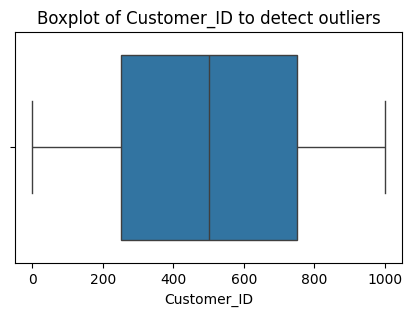

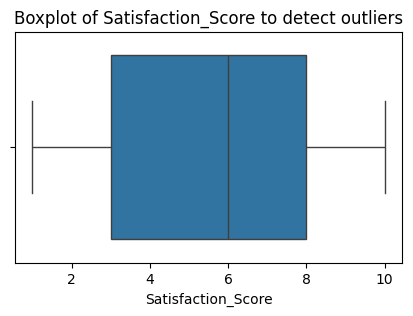

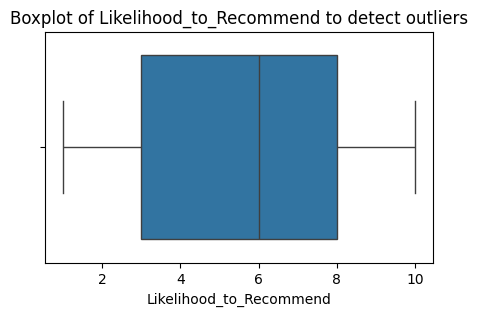

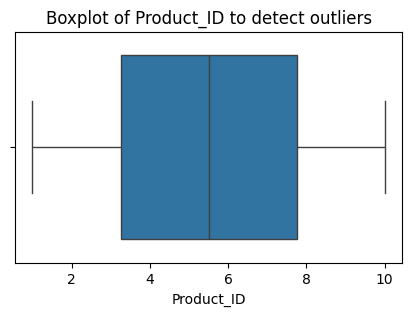

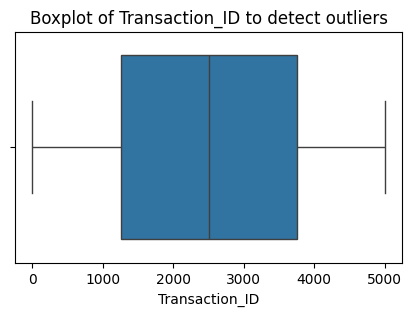

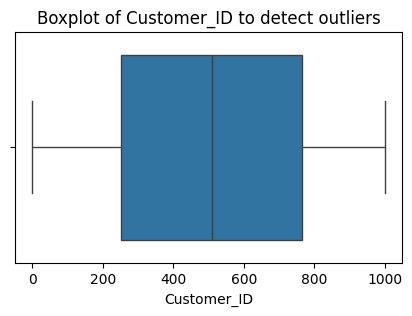

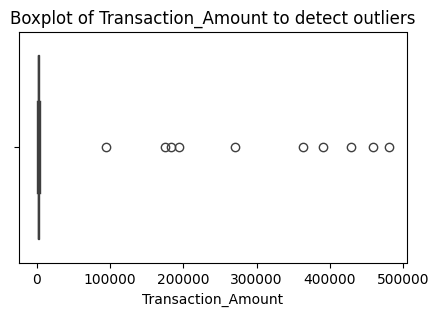

In [24]:
# Check for outliers using boxplot for all data sets

# Function to detect and visualize outliers using boxplots
def detect_outliers_boxplot(df, column_name):
    # Check if the column has any non-NaN values before creating the boxplot
    if df[column_name].notna().any():
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=df[column_name])
        plt.title(f'Boxplot of {column_name} to detect outliers')
        plt.show()
    else:
        print(f"Skipping boxplot for '{column_name}' as it contains only NaN values.")

# Loop through each DataFrame and its numerical columns in dfs_cleaned
for name, df in dfs_cleaned.items():  # Changed to dfs_cleaned
    numerical_cols = df.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        detect_outliers_boxplot(df, col)

In [25]:
top_20_transactions = dfs_cleaned['Transaction Data'].nlargest(20, 'Transaction_Amount')
print(top_20_transactions)

      Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
612              613          191 2023-01-26 12:00:00            480300.0   
3037            3038          690 2023-05-07 13:00:00            458600.0   
2270            2271          521 2023-04-05 14:00:00            428900.0   
1264            1265          772 2023-02-22 16:00:00            390200.0   
4852            4853          396 2023-07-22 04:00:00            362700.0   
3059            3060          195 2023-05-08 11:00:00            270900.0   
1738            1739           27 2023-03-14 10:00:00            194500.0   
2045            2046           59 2023-03-27 05:00:00            183500.0   
3289            3290          649 2023-05-18 01:00:00            175600.0   
2184            2185          850 2023-04-02 00:00:00             94500.0   
1413            1414          329 2023-02-28 21:00:00              4999.0   
4608            4609          830 2023-07-12 00:00:00              4997.0   

In [26]:
transactions.describe()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount
count,5000.000000,5000.000000,5000,5000.000000
mean,2500.500000,505.295400,2023-04-15 03:30:00,3103.231136
min,1.000000,1.000000,2023-01-01 00:00:00,10.000000
25%,1250.750000,252.000000,2023-02-22 01:45:00,1260.000000
50%,2500.500000,509.000000,2023-04-15 03:30:00,2539.000000
75%,3750.250000,765.250000,2023-06-06 05:15:00,3724.000000
max,5000.000000,1000.000000,2023-07-28 07:00:00,480300.000000
std,1443.520003,291.844284,NaN,14743.580770



Transactions_Amount
*   Box plot shows 10 extreme values
*   Top 20 highest Transactions_Amount confirm these 10
*   Average transaction amount is 3,103 and the median is 2,539 and 75th percentile is 3724 but max value is 480300
*   Even though they seem extreme, we can't just delete these outliers. High transaction amounts might be normal for this type of data.



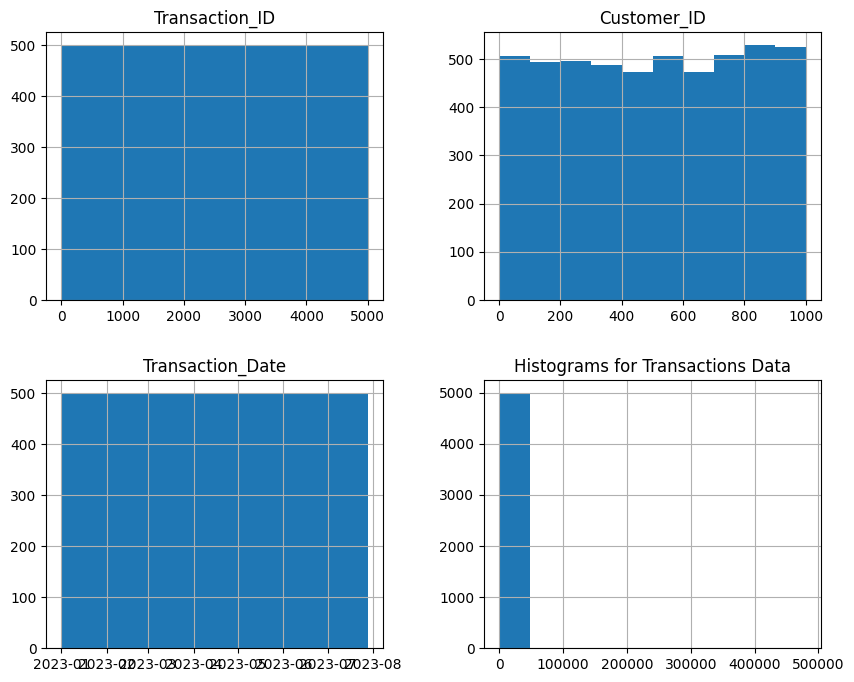

In [27]:
# Histograms for numerical columns in transactions
transactions.hist(figsize=(10, 8))
plt.title('Histograms for Transactions Data')
plt.show()

Transaction_Amount histogram shows a right-skewed distribution, consistent with the boxplot above.

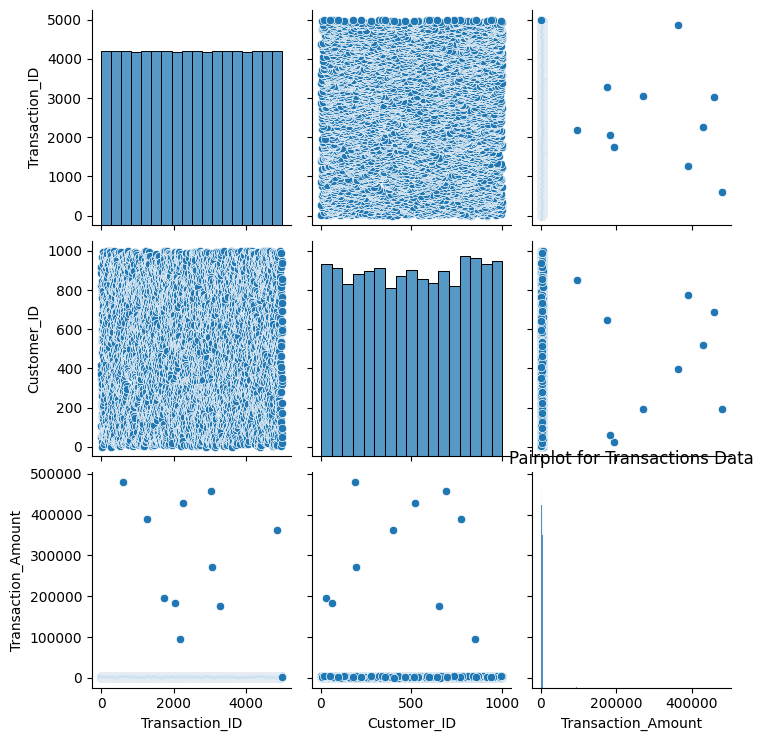

In [28]:
# Pairplot to examine relationships between features in transactions
sns.pairplot(transactions.select_dtypes(include=[np.number]))
plt.title('Pairplot for Transactions Data')
plt.show()

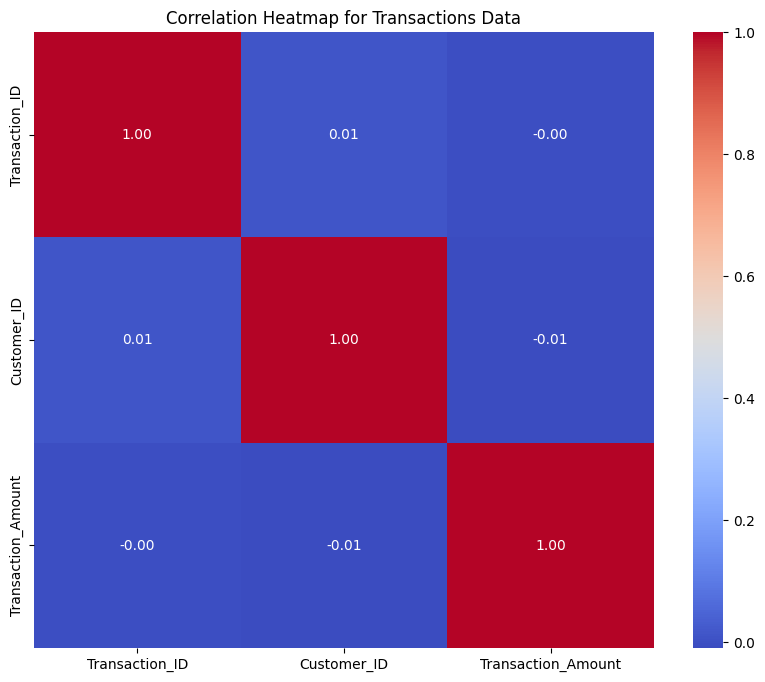

In [29]:
# Visualizing correlations between numerical columns in transactions
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation analysis
numerical_transactions = transactions.select_dtypes(include=[np.number])
sns.heatmap(numerical_transactions.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap for Transactions Data')
plt.show()

Based on heatmap, no strong linear relationships